Import necessary libraries, initialize a pandas dataframe with the fish_data, and observe the features and potential preprocessing paths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import sklearn
import tensorflow 

In [2]:
data = pd.read_csv("fish_data.csv")

In [3]:
data

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
0,1,14.69,5.87,ponds,6.2,Reddish_Orange,False,10.9
1,2,1.32,3.86,idlewater,6.8,Calico,True,5.2
2,3,14.23,12.09,lakes,7.9,Reddish_Orange,True,25.3
3,4,2.54,3.20,rivers,6.7,White,False,16.4
4,5,13.10,9.81,lakes,7.8,Orange,True,3.2
...,...,...,...,...,...,...,...,...
1995,1996,16.12,6.46,ponds,8.0,Red_and_White_Bi_Color,NaN,6.4
1996,1997,7.50,7.07,rivers,6.3,Black_and_Orange,True,14.0
1997,1998,10.52,3.27,slowmovingwaters,6.1,Orange,True,13.1
1998,1999,7.70,15.41,ponds,7.8,Orange,False,15.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


Notice the null values for the gender feature; I opted to just drop this data completely. We then create the training set and testing set. I use the convention of allocating 20% of our data to test set.

In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1976 non-null   int64  
 1   average_length(inches))  1976 non-null   float64
 2   average_weight(inches))  1976 non-null   float64
 3   habitat                  1976 non-null   object 
 4   ph_of_water              1976 non-null   float64
 5   color                    1976 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                1976 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 138.9+ KB


In [7]:
data = data.rename(columns = {"average_weight(inches))" : "average_weight(ounces))"})
data = data.drop('id', axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_length(inches))  1976 non-null   float64
 1   average_weight(ounces))  1976 non-null   float64
 2   habitat                  1976 non-null   object 
 3   ph_of_water              1976 non-null   float64
 4   color                    1976 non-null   object 
 5   Gender                   1976 non-null   object 
 6   life_span                1976 non-null   float64
dtypes: float64(4), object(3)
memory usage: 123.5+ KB


Ignoring the object types, create a heatmap of our training set to see what features correlate with the lifespan. In this case, we can observe that there is low correlation for all the features. This  that there is not necessarily not a linear association with any one feature to the life_span. 

<Axes: >

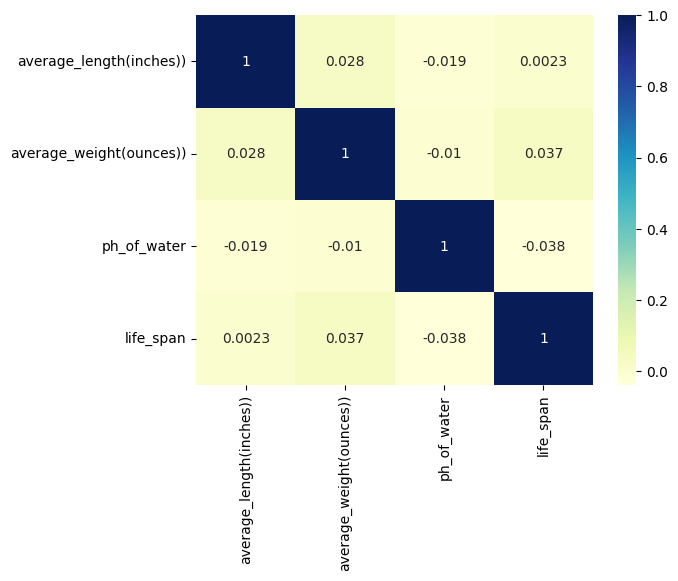

In [9]:
sns.heatmap(data[['average_length(inches))', 'average_weight(ounces))', "ph_of_water", "life_span"]].corr(), annot = True, cmap = "YlGnBu")

Observe the train_set histogram: we see a relatively equal distribution.
We could pursue an np.log function on our features, but it will actually cause more skewed data.

array([[<Axes: title={'center': 'average_length(inches))'}>,
        <Axes: title={'center': 'average_weight(ounces))'}>],
       [<Axes: title={'center': 'ph_of_water'}>,
        <Axes: title={'center': 'life_span'}>]], dtype=object)

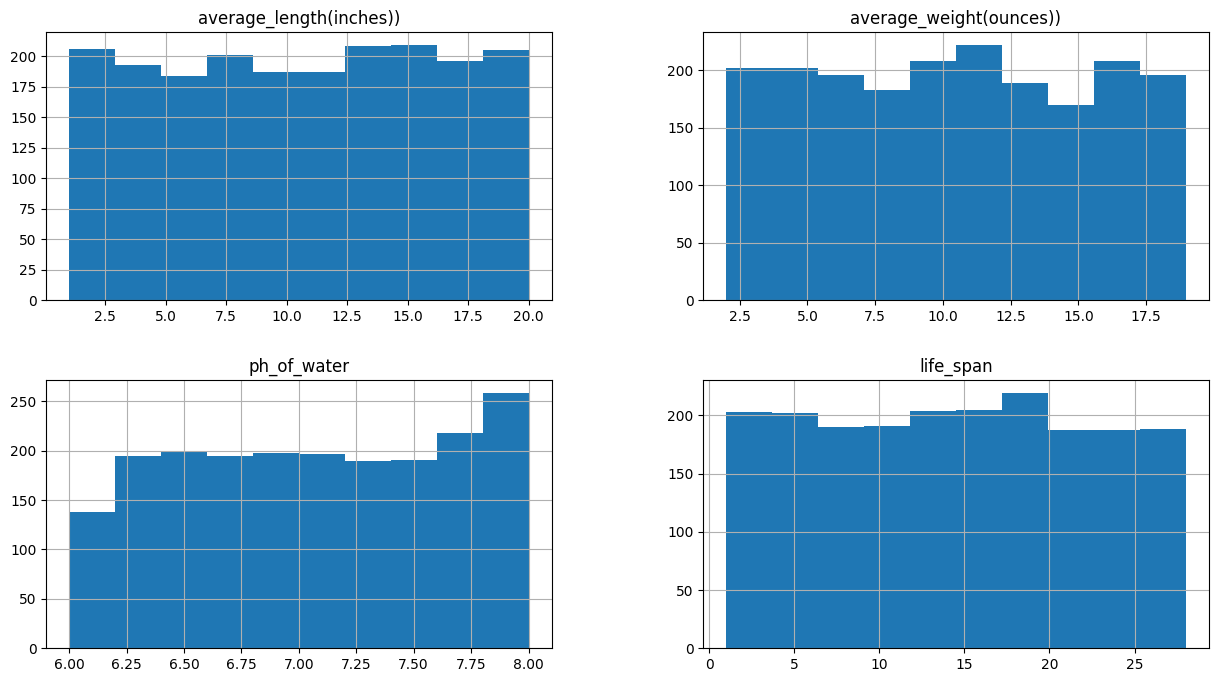

In [10]:
data[['average_length(inches))', 'average_weight(ounces))', "ph_of_water", "life_span"]].hist(figsize = (15,8))

Now we do one hot encoding to ensure that features of type object can also be viewed and linear associations can be understood. After our one hot encoding, we can call a heatmap again to view the associations.

In [11]:

data = data.join(pd.get_dummies(data.habitat, dtype = 'int')).drop(['habitat'], axis = 1)
data = data.join(pd.get_dummies(data.color, dtype = 'int')).drop(['color'], axis = 1)
data = data.join(pd.get_dummies(data.Gender, dtype = 'int')).drop(['Gender'], axis = 1)

data = data.rename(columns = {True : "Male", False : "Female"})


In [12]:
data

,average_length(inches)),average_weight(ounces)),ph_of_water,life_span,idlewater,lakes,ponds,rivers,slowmovingwaters,Black_and_Orange,Calico,Green_and_Chocolate,Orange,Red_and_Silver,Red_and_White_Bi_Color,Reddish_Orange,White,Yellow,Female,Male
0,14.69,5.87,6.2,10.9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1.32,3.86,6.8,5.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,14.23,12.09,7.9,25.3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2.54,3.20,6.7,16.4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,13.10,9.81,7.8,3.2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8.60,5.57,7.0,20.1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1996,7.50,7.07,6.3,14.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1997,10.52,3.27,6.1,13.1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1998,7.70,15.41,7.8,15.6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_length(inches))  1976 non-null   float64
 1   average_weight(ounces))  1976 non-null   float64
 2   ph_of_water              1976 non-null   float64
 3   life_span                1976 non-null   float64
 4   idlewater                1976 non-null   int32  
 5   lakes                    1976 non-null   int32  
 6   ponds                    1976 non-null   int32  
 7   rivers                   1976 non-null   int32  
 8   slowmovingwaters         1976 non-null   int32  
 9   Black_and_Orange         1976 non-null   int32  
 10  Calico                   1976 non-null   int32  
 11  Green_and_Chocolate      1976 non-null   int32  
 12  Orange                   1976 non-null   int32  
 13  Red_and_Silver           1976 non-null   int32  
 14  Red_and_White_Bi_Color   1976

<Axes: >

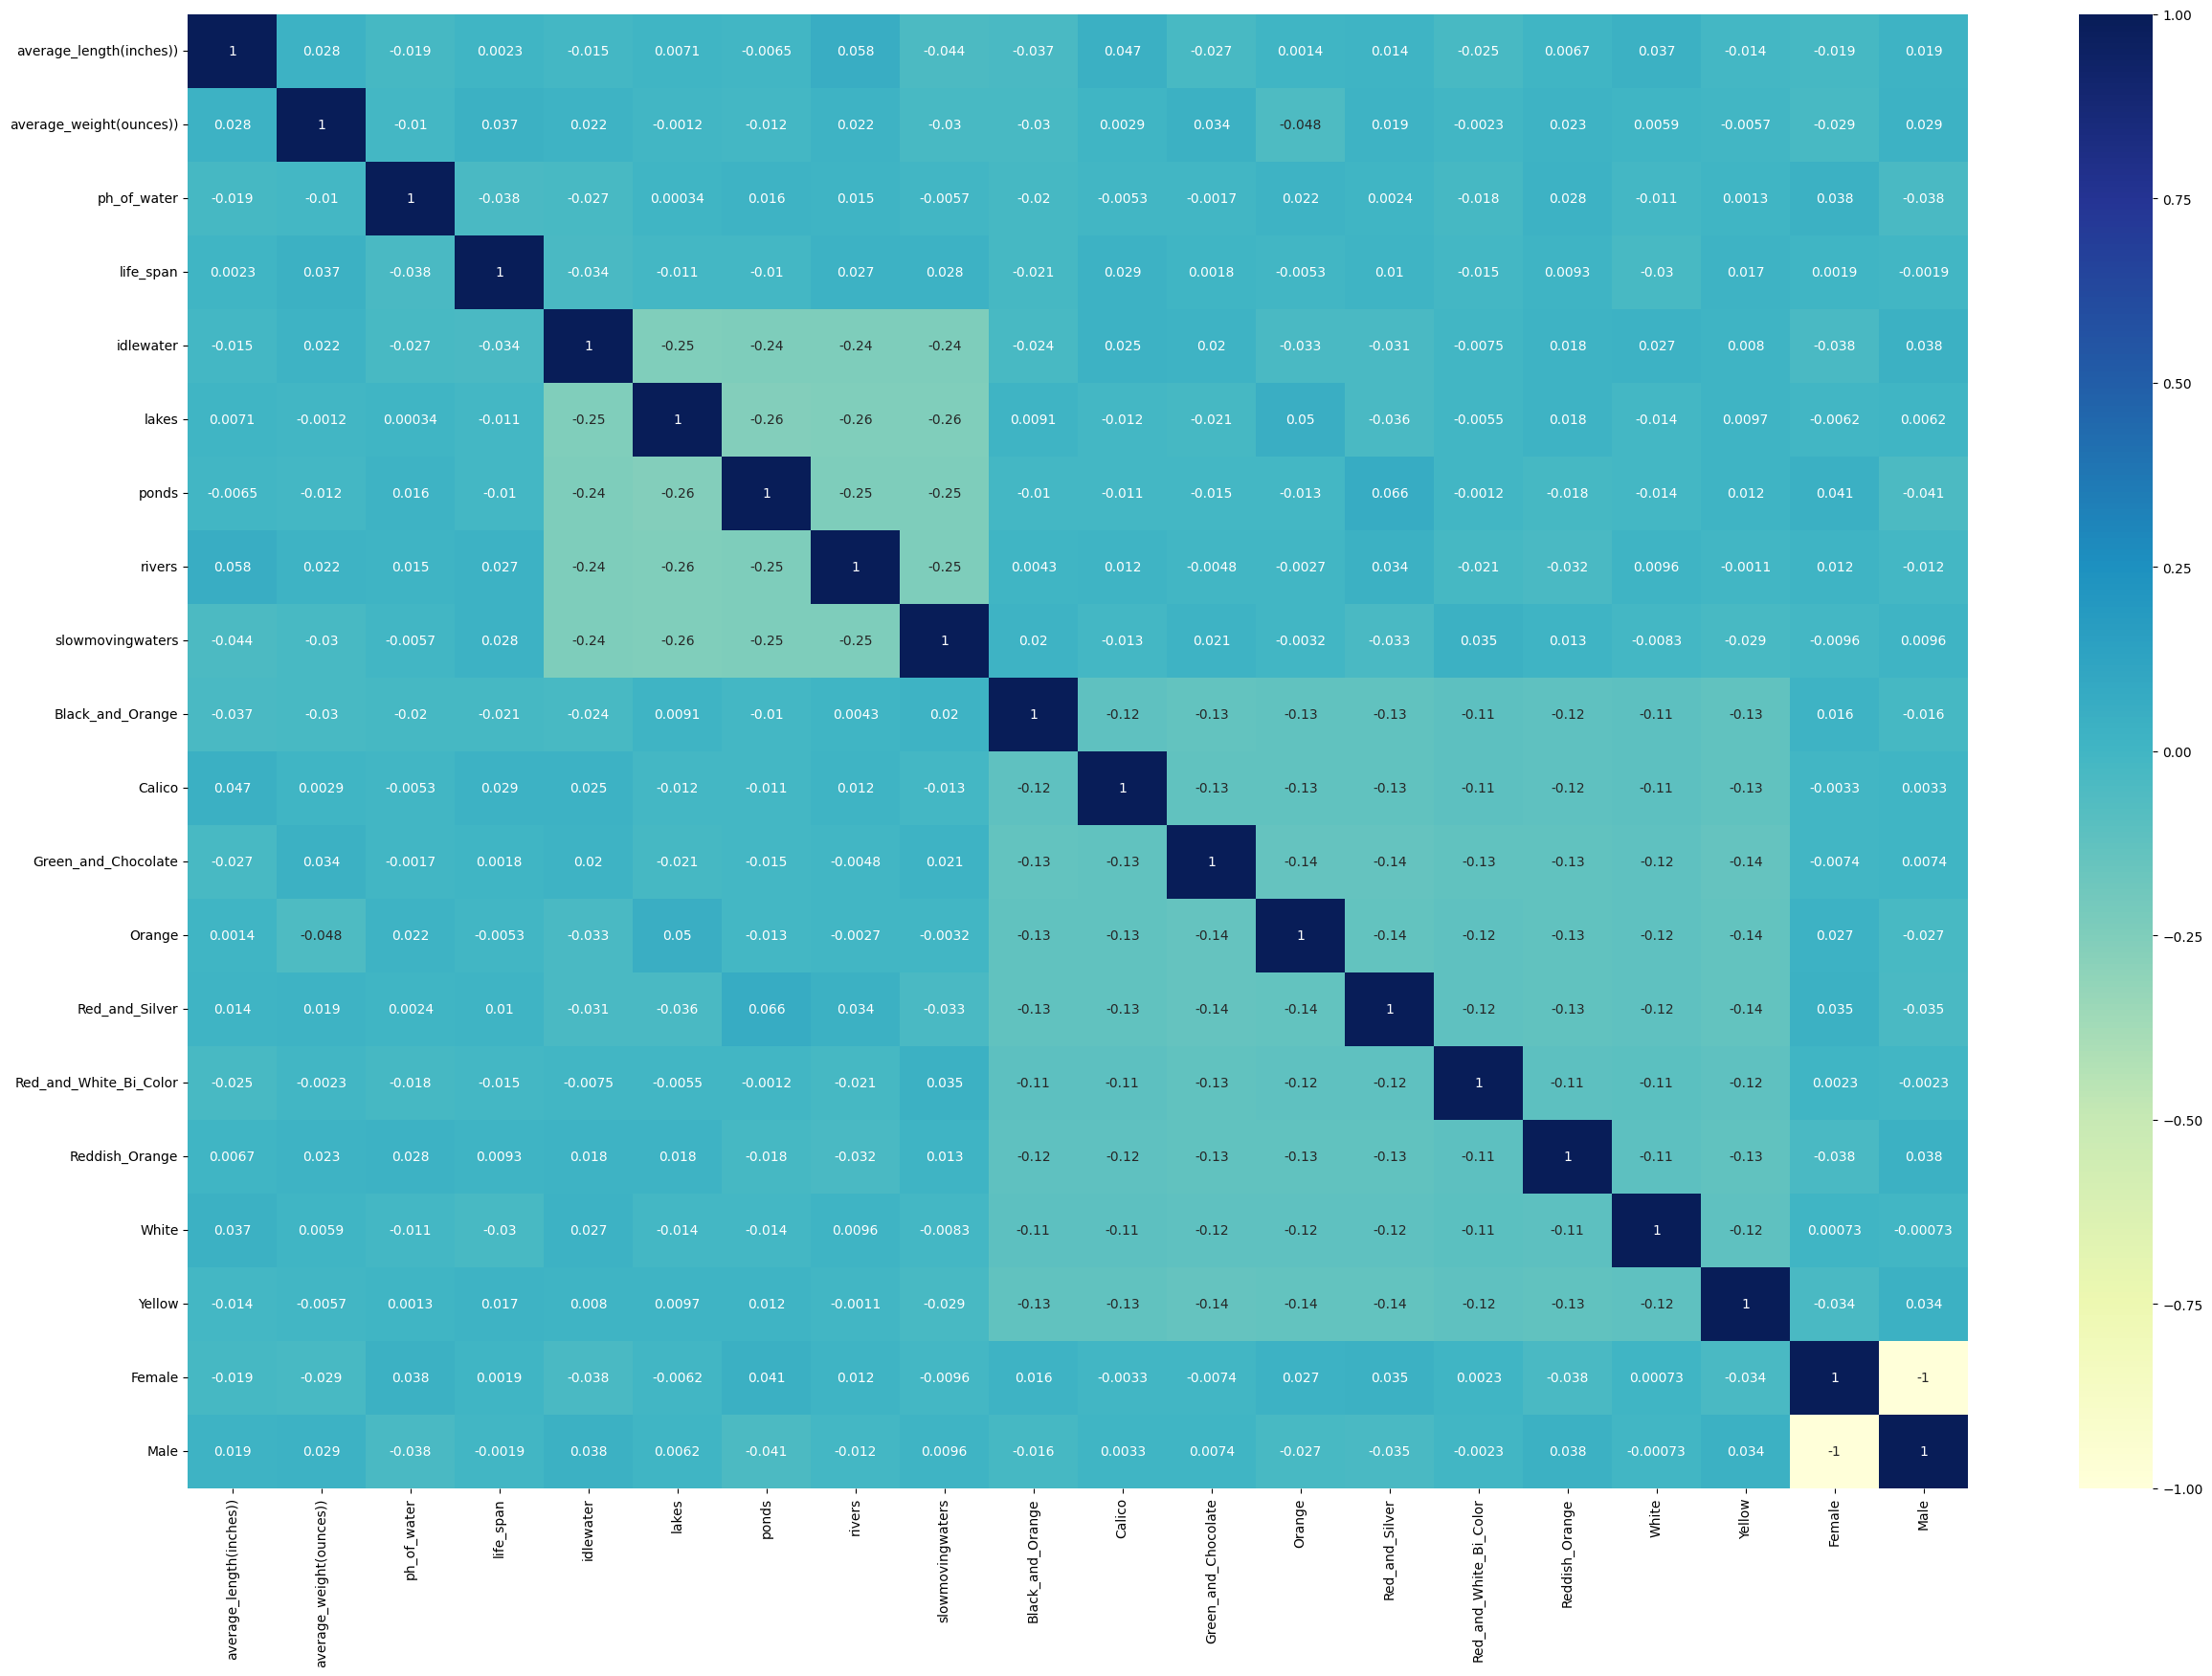

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(['life_span'], axis = 1)
y = data['life_span']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 13)

Multicollinearity check function is created. Here we can notice that the only columns with even a hint of correlation with each other are columns that were under the same feature before one hot encoding. In essence, if your habitat is a river then there's obviously a chance that your habitat isn't going to be a lake or a pond. If your gender is male, then you have a negative correlation to being female. We won't be dropping these columns because it makes sense that they're correlated negatively.

In [16]:
X_train.corr()

,average_length(inches)),average_weight(ounces)),ph_of_water,idlewater,lakes,ponds,rivers,slowmovingwaters,Black_and_Orange,Calico,Green_and_Chocolate,Orange,Red_and_Silver,Red_and_White_Bi_Color,Reddish_Orange,White,Yellow,Female,Male
average_length(inches)),1.000000,0.020680,-0.024910,-0.010463,0.012275,-0.015327,0.066629,-0.052272,-0.049938,0.045159,-0.017765,-0.007729,-0.004354,-0.024285,0.024272,0.031913,0.005175,-0.017169,0.017169
average_weight(ounces)),0.020680,1.000000,-0.021974,0.024817,-0.017185,-0.015229,0.022249,-0.013739,-0.021874,-0.006995,0.034829,-0.059882,0.018667,-0.000940,0.032401,0.018459,-0.016092,-0.032504,0.032504
ph_of_water,-0.024910,-0.021974,1.000000,-0.033779,-0.020282,0.024294,0.021961,0.008003,-0.019863,-0.009805,-0.012421,0.024162,-0.011958,-0.014897,0.031757,0.003696,0.009677,0.035606,-0.035606
idlewater,-0.010463,0.024817,-0.033779,1.000000,-0.252356,-0.245066,-0.240487,-0.248260,-0.012526,0.014847,0.014645,-0.033277,-0.025852,-0.020851,0.015831,0.047466,0.002028,-0.041025,0.041025
lakes,0.012275,-0.017185,-0.020282,-0.252356,1.000000,-0.256671,-0.251876,-0.260017,-0.015279,-0.002980,-0.021657,0.076365,-0.043248,0.012728,0.002750,-0.026358,0.018722,-0.000944,0.000944
ponds,-0.015327,-0.015229,0.024294,-0.245066,-0.256671,1.000000,-0.244599,-0.252505,-0.017017,-0.014038,-0.008281,-0.037657,0.065218,-0.004689,0.001378,-0.008915,0.019225,0.038176,-0.038176
rivers,0.066629,0.022249,0.021961,-0.240487,-0.251876,-0.244599,1.000000,-0.247788,0.012462,0.025132,-0.015721,-0.003900,0.039276,-0.025520,-0.022706,0.000995,-0.010955,0.020766,-0.020766
slowmovingwaters,-0.052272,-0.013739,0.008003,-0.248260,-0.260017,-0.252505,-0.247788,1.000000,0.032390,-0.022298,0.031122,-0.003226,-0.034190,0.037317,0.002583,-0.012136,-0.029224,-0.017008,0.017008
Black_and_Orange,-0.049938,-0.021874,-0.019863,-0.012526,-0.015279,-0.017017,0.012462,0.032390,1.000000,-0.119331,-0.135466,-0.121180,-0.128067,-0.111764,-0.118960,-0.109432,-0.131616,0.017680,-0.017680
Calico,0.045159,-0.006995,-0.009805,0.014847,-0.002980,-0.014038,0.025132,-0.022298,-0.119331,1.000000,-0.136315,-0.121940,-0.128871,-0.112465,-0.119706,-0.110119,-0.132441,-0.005573,0.005573


In [17]:
def correlation(df, threshold):
    correlated_columns = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])) > threshold:
                colname = corr_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns



In [18]:
correlation(X,0.2)

{'Male', 'lakes', 'ponds', 'rivers', 'slowmovingwaters'}

Now we will implement a linear regression model. We train the model on a scaled X_train, and then test the data using the scaled test_set X and y variables. Notice that the linear regression model and the random forest regressor model performs poorly. 
Initially, I believed that our model simply had nonlinear associations, but this wouldn't account for the random forest regressor performing poorly, as it thrives in nonlinear environments. After reviewing the models of others, it's clear to see that the current training of models isn't adequate. 

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
scaler = StandardScaler()
reg = LinearRegression()

X_train_s = scaler.fit_transform(X_train)
reg.fit(X_train_s, y_train)



LinearRegression()

In [20]:
X_test_s = scaler.transform(X_test)
score = reg.score(X_test_s, y_test)

y_pred = reg.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 61.26
Root Mean Squared Error (RMSE): 7.83
Score:-0.016795027075235502


Below are lasso models and ridge models, which use l1 and l2 regularization respectively to build off of a flawed linear regression model.

In [21]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
lasso_reg = linear_model.Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
lasso_grid_search.fit(X_train_s, y_train)

best_lasso = lasso_grid_search.best_estimator_
score = best_lasso.score(X_test_s, y_test)



In [22]:
y_pred = best_lasso.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")

Mean Absolute Error (MAE): 6.81
Mean Squared Error (MSE): 60.25
Root Mean Squared Error (RMSE): 7.76
Score:-5.851963498670898e-06


In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
ridge_grid_search.fit(X_train_s, y_train)

best_ridge = ridge_grid_search.best_estimator_
score = best_ridge.score(X_test_s, y_test)



In [24]:
y_pred = best_ridge.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.83
Mean Squared Error (MSE): 61.29
Root Mean Squared Error (RMSE): 7.83
Score:-0.017308649370941787


In [25]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train_s, y_train)
score = reg.score(X_test_s, y_test)

y_pred = reg.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.86
Mean Squared Error (MSE): 63.85
Root Mean Squared Error (RMSE): 7.99
Score:-0.059755050764023876


After experimenting with GridSearchCV, I found that the optimal n_estimators was 700. This achieves an MAE of 6.78, but a R^2 score significantly lower than previous models

In [26]:
reg = RandomForestRegressor()
param_grid = {
    "n_estimators" : [700],
    "max_depth" : [4],
}

forest_grid_search = GridSearchCV(reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
forest_grid_search.fit(X_train_s, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4], 'n_estimators': [700]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
best_forest = forest_grid_search.best_estimator_
score = best_forest.score(X_test_s, y_test)
y_pred = best_forest.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.78
Mean Squared Error (MSE): 60.26
Root Mean Squared Error (RMSE): 7.76
Score:-0.00030780255827589365


In [28]:
forest_grid_search.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=700)

Notice below: length, weight, and pH contributed the most to the decision. 

In [29]:
feature_list = list(X.columns)
feature_imp = pd.Series(best_forest.feature_importances_, index = feature_list).sort_values
print(feature_imp)

<bound method Series.sort_values of average_length(inches))    0.294568
average_weight(ounces))    0.322269
ph_of_water                0.153765
idlewater                  0.019629
lakes                      0.014216
ponds                      0.011018
rivers                     0.014394
slowmovingwaters           0.015169
Black_and_Orange           0.013715
Calico                     0.036698
Green_and_Chocolate        0.006446
Orange                     0.006863
Red_and_Silver             0.012067
Red_and_White_Bi_Color     0.015030
Reddish_Orange             0.011626
White                      0.023891
Yellow                     0.011301
Female                     0.008113
Male                       0.009223
dtype: float64>


We will now try a sequential neural network model. Notice that this model scores significantly lower than the hyper parameterized decision tree

In [30]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
model = Sequential()
model.add(Dense(45, input_dim = 19, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae', 'R2Score'])
model.summary()

history = model.fit(X_train_s, y_train, validation_split = 0.2, epochs = 200)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                900       
                                                                 
 dense_1 (Dense)             (None, 4)                 184       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1089 (4.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200


42/42 [==============================] - 1s 6ms/step - loss: 191.4772 - mae: 11.6233 - r2_score: -2.2328 - val_loss: 163.6858 - val_mae: 10.6713 - val_r2_score: -1.7289
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 130.2386 - mae: 9.3217 - r2_sc

In [31]:
mse_neural, mae_neural, score = model.evaluate(X_test_s, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 67.1448 - mae: 7.0211 - r2_score: -0.1145
